In [ ]:
cd /content/drive/My Drive/CT_Scan

/content/drive/My Drive/CT_Scan


In [ ]:
!pip install pydicom

In [ ]:
import pydicom as dicom # for reading dicom files
import os # for doing directory operations 
import pandas as pd # for some simple data analysis 
# Working Data Directory
data_dir = '/content/drive/My Drive/CT_Scan/LungCT-Diagnosis/'
patients = os.listdir(data_dir)

labels_df = pd.read_csv('LungCT-Labels - Sheet1.csv', index_col=0)

labels_df.head()

,Labels
Patient Id,
R_004,1
R_006,1
R_013,1
R_014,1
R_019,0


In [ ]:
for patient in patients[:10]:
    label = labels_df.at[patient, 'Labels']
    path = data_dir + patient
#slices= no. of scans in each patient folder    
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    print(slices[0].pixel_array.shape, len(slices))

(512, 512) 148
(512, 512) 67
(512, 512) 63
(512, 512) 74
(512, 512) 109
(512, 512) 150
(512, 512) 76
(512, 512) 71
(512, 512) 67
(512, 512) 81


In [ ]:
len(patients)


60

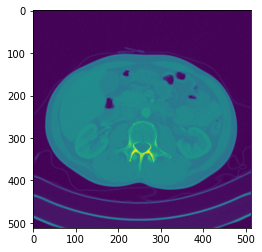

In [ ]:
import matplotlib.pyplot as plt

for patient in patients[:1]:
    label = labels_df.at[patient, 'Labels']
    path = data_dir + patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    
    # displaying the first slice
    plt.imshow(slices[0].pixel_array)
    plt.show()

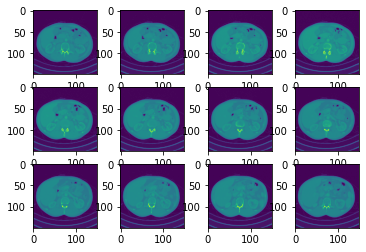

In [ ]:
import cv2
import numpy as np
#Pixel size of the resized image
IMG_PX_SIZE = 150

for patient in patients[:1]:
    label = labels_df.at[patient, 'Labels']
    path = data_dir + patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    fig = plt.figure()
    # displaying the images after resizing
    for num,each_slice in enumerate(slices[:12]):
        y = fig.add_subplot(3,4,num+1)
        new_img = cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE))
        y.imshow(new_img)
    plt.show()

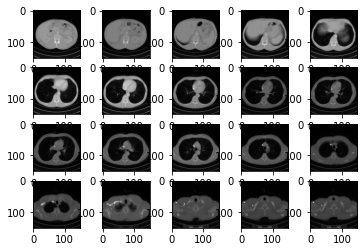

In [ ]:


for patient in patients[:1]:
    label = labels_df.at[patient, 'Labels']
    path = data_dir + patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    new_slices = []

    slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)) for each_slice in slices]
    # Making the number of slices uniform for every patient by making chunks
    chunk_sizes = math.ceil(len(slices) / HM_SLICES)
    for slice_chunk in chunks(slices, chunk_sizes):
        slice_chunk = list(map(mean, zip(*slice_chunk)))
        new_slices.append(slice_chunk)

    if len(new_slices) == HM_SLICES-1:
        new_slices.append(new_slices[-1])

    if len(new_slices) == HM_SLICES-2:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])

    if len(new_slices) == HM_SLICES+2:
        new_val = list(map(mean, zip(*[new_slices[HM_SLICES-1],new_slices[HM_SLICES],])))
        del new_slices[HM_SLICES]
        new_slices[HM_SLICES-1] = new_val
        
    if len(new_slices) == HM_SLICES+1:
        new_val = list(map(mean, zip(*[new_slices[HM_SLICES-1],new_slices[HM_SLICES],])))
        del new_slices[HM_SLICES]
        new_slices[HM_SLICES-1] = new_val

    if len(new_slices) == HM_SLICES-3:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])

    if len(new_slices) == HM_SLICES-4:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])   
      
    #visualizing the slices
    fig = plt.figure()
    for num,each_slice in enumerate(new_slices):
        y = fig.add_subplot(4,5,num+1)
        y.imshow(each_slice, cmap='gray')
    plt.show()

In [ ]:
# The entire image pre-processing functions
import numpy as np
import pandas as pd
import pydicom as dicom
import os
import matplotlib.pyplot as plt
import cv2
import math

IMG_SIZE_PX = 150
SLICE_COUNT = 20

def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]


def mean(a):
    return sum(a) / len(a)


def process_data(patient,labels_df,img_px_size=150, hm_slices=20, visualize=False):
    
    label = labels_df.at[patient, 'Labels']
    path = data_dir + patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))

    new_slices = []
    slices = [cv2.resize(np.array(each_slice.pixel_array),(img_px_size,img_px_size)) for each_slice in slices]
    
    chunk_sizes = math.ceil(len(slices) / hm_slices)
    for slice_chunk in chunks(slices, chunk_sizes):
        slice_chunk = list(map(mean, zip(*slice_chunk)))
        new_slices.append(slice_chunk)

    if len(new_slices) == hm_slices-1:
        new_slices.append(new_slices[-1])

    if len(new_slices) == hm_slices-2:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])

    if len(new_slices) == hm_slices+2:
        new_val = list(map(mean, zip(*[new_slices[hm_slices-1],new_slices[hm_slices],])))
        del new_slices[hm_slices]
        new_slices[hm_slices-1] = new_val
        
    if len(new_slices) == hm_slices+1:
        new_val = list(map(mean, zip(*[new_slices[hm_slices-1],new_slices[hm_slices],])))
        del new_slices[hm_slices]
        new_slices[hm_slices-1] = new_val

    if len(new_slices) == hm_slices-3:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])

    if len(new_slices) == hm_slices-4:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1]) 

    if visualize:
        fig = plt.figure()
        for num,each_slice in enumerate(new_slices):
            y = fig.add_subplot(4,5,num+1)
            y.imshow(each_slice, cmap='gray')
        plt.show()

    if label == 1: label=np.array([0,1])
    elif label == 0: label=np.array([1,0])
    print(len(slices), len(new_slices))
        
    return np.array(new_slices),label

data_dir = '/content/drive/My Drive/CT_Scan/LungCT-Diagnosis/'
patients = os.listdir(data_dir)
labels = pd.read_csv('LungCT-Labels - Sheet1.csv', index_col=0)

image_full_data = [] #list of the concatenated 3D images and their corresponding labels 

for num,patient in enumerate(patients):
    if num % 100 == 0:
        print(num)
    try:
        img_data,label = process_data(patient,labels,img_px_size=IMG_SIZE_PX, hm_slices=SLICE_COUNT)
        #print(img_data.shape,label)
        image_full_data.append([img_data, label])
        # labels_data.append(label)
    except KeyError as e:
        print('This is unlabeled data!')

np.save('imagedata.npy'.format(IMG_SIZE_PX,IMG_SIZE_PX,SLICE_COUNT), image_full_data)


0
148 20
67 20
63 20
74 20
109 20
150 20
76 20
71 20
67 20
81 20
62 20
111 20
70 20
118 20
69 20
104 20
65 20
112 20
63 20
98 20
83 20
78 20
115 20
66 20
87 20
88 20
86 20
65 20
55 20
49 20
68 20
73 20
110 20
87 20
93 20
71 20
34 20
65 20
77 20
69 20
108 20
62 20
79 20
62 20
76 20
68 20
76 20
63 20
59 20
62 20
69 20
40 20
58 20
62 20
74 20
68 20
65 20
93 20
65 20
74 20


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

image_full_data = np.load('imagedata.npy', allow_pickle=True)
#shuffling the image full data to remove the clustering of similar type of labels
random.shuffle(image_full_data)
# Preparing the train and validation sets
train_data = image_full_data[:50]
validation_data = image_full_data[50:]

train_Y=[]
valid_Y=[]
for data in train_data:
   Y = data[1]
   train_Y.append(Y)
for data in validation_data:
  Y = data[1]
  # print(Y)
  valid_Y.append(Y)

train_X = [data[0] for data in train_data]
train_X = np.concatenate([arr[np.newaxis] for arr in train_X])  #creating a 4D array from 3 dimensional image arrays 
valid_X = [data[0] for data in validation_data] 
valid_X = np.concatenate([arr[np.newaxis] for arr in valid_X]) 

train_X = np.reshape(train_X, (50,20,150,150,1))
#train_X = np.expand_dims(train_X, axis = 0)
train_Y = np.array(train_Y)
valid_X = np.reshape(valid_X, (10,20,150,150,1))
valid_Y = np.array(valid_Y)

print(train_Y.shape)
print(valid_Y.shape)
print(train_X.shape)
print(valid_X.shape)

(50, 2)
(10, 2)
(50, 20, 150, 150, 1)
(10, 20, 150, 150, 1)


In [ ]:
#importing the layers from keras and all the necessary libraries
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv3D, MaxPooling3D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [ ]:
#3d sequential cnn architecture 
cnn4 = Sequential([
    Conv3D(32, kernel_size=(3, 3, 3), activation='relu', padding='same', input_shape=(20,150,150,1)),
    Conv3D(32, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    MaxPooling3D(pool_size=(2, 2, 2), padding = 'same', data_format = 'channels_last'),
    Dropout(0.2)
    
    
    Conv3D(64, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    Conv3D(64, kernel_size=(3, 3, 3), activation='relu', padding='same'),    
    MaxPooling3D(pool_size=(2, 2, 2), padding = 'same', data_format = 'channels_last'),
    Dropout(0.2)
    
    Conv3D(128, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    Conv3D(128, kernel_size=(3, 3, 3), activation='relu', padding='same'),    
    MaxPooling3D(pool_size=(2, 2, 2), padding = 'same', data_format = 'channels_last'),
    Dropout(0.2)
    
    Conv3D(256, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    Conv3D(256, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    Conv3D(256, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    MaxPooling3D(pool_size=(2, 2, 2), padding = 'same', data_format = 'channels_last'),

    Conv3D(512, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    Conv3D(512, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    Conv3D(512, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    MaxPooling3D(pool_size=(2, 2, 2), padding = 'same', data_format = 'channels_last'),

    Flatten(),

    Dense(1024, activation='sigmoid'),
    Dropout(0.2),
    Dense(1024, activation='sigmoid'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])
cnn4.summary()

In [ ]:
#compiling using stochastic gradient descent
from keras.optimizers import SGD
sgd = SGD(lr=1e-6)
cnn4.compile(loss = 'binary_crossentropy', optimizer =sgd, metrics = ["accuracy"])

In [ ]:
#fitting the model
cnn4.fit(train_X, train_Y, batch_size=5, epochs=10, verbose=1, validation_data =(valid_X,valid_Y))

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 438s 9s/step - loss: 0.7193 - accuracy: 0.5400 - val_loss: 0.7033 - val_accuracy: 0.3000
Epoch 2/10
50/50 [==============================] - 438s 9s/step - loss: 0.7674 - accuracy: 0.4600 - val_loss: 0.7032 - val_accuracy: 0.3000
Epoch 3/10
50/50 [==============================] - 429s 9s/step - loss: 0.6876 - accuracy: 0.5800 - val_loss: 0.7029 - val_accuracy: 0.3000
Epoch 4/10
50/50 [==============================] - 429s 9s/step - loss: 0.6987 - accuracy: 0.4400 - val_loss: 0.7027 - val_accuracy: 0.3000
Epoch 5/10
50/50 [==============================] - 433s 9s/step - loss: 0.7390 - accuracy: 0.4600 - val_loss: 0.7025 - val_accuracy: 0.3000
Epoch 6/10
50/50 [==============================] - 433s 9s/step - loss: 0.7550 - accuracy: 0.3800 - val_loss: 0.7023 - val_accuracy: 0.3000
Epoch 7/10
50/50 [==============================] - 430s 9s/step - loss: 0.7257 - accuracy: 0.4600 - val_loss:

In [ ]:
cnn4.save("our_model")

In [ ]:
#improving accuracy with another architecture - HybridNET
import keras
from keras.layers import Conv2D, Conv3D, Flatten, Dense, Reshape, BatchNormalization
from keras.layers import Dropout, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score

from operator import truediv

from plotly.offline import init_notebook_mode

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os


init_notebook_mode(connected=True)
%matplotlib inline

In [ ]:
input_layer = Input((20, 150, 150, 1))

## convolutional layers
conv_layer1 = Conv3D(filters=8, kernel_size=(3, 3, 7), activation='relu')(input_layer)
conv_layer2 = Conv3D(filters=16, kernel_size=(3, 3, 5), activation='relu')(conv_layer1)
conv_layer3 = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(conv_layer2)
print(conv_layer3._keras_shape)
conv3d_shape = conv_layer3._keras_shape
conv_layer3 = Reshape((conv3d_shape[1], conv3d_shape[2], conv3d_shape[3]*conv3d_shape[4]))(conv_layer3) #reshaping the 3D layer to form a Conv2D layer
conv_layer4 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(conv_layer3)

flatten_layer = Flatten()(conv_layer4)

## fully connected layers
dense_layer1 = Dense(units=256, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
dense_layer2 = Dense(units=128, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.4)(dense_layer2)
output_layer = Dense(units=2, activation='softmax')(dense_layer2)

(None, 14, 144, 138, 32)


In [ ]:
model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 20, 150, 150, 1)   0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 18, 148, 144, 8)   512       
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 16, 146, 140, 16)  5776      
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 14, 144, 138, 32)  13856     
_________________________________________________________________
reshape_1 (Reshape)          (None, 14, 144, 4416)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 142, 64)       2543680   
_________________________________________________________________
flatten_1 (Flatten)          (None, 109056)            0   

In [ ]:
#compiling the model using adam optimizer
adam = Adam(lr=0.001, decay=1e-06)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
#fitting the model
model.fit(train_X, train_Y, batch_size=5, epochs=5, verbose=1, validation_data =(valid_X,valid_Y))

Train on 50 samples, validate on 10 samples
Epoch 1/5
50/50 [==============================] - 140s 3s/step - loss: 0.5835 - accuracy: 0.9000 - val_loss: 2.1722 - val_accuracy: 0.7000
Epoch 2/5
50/50 [==============================] - 141s 3s/step - loss: 0.4189 - accuracy: 0.8800 - val_loss: 0.6526 - val_accuracy: 0.6000
Epoch 3/5
50/50 [==============================] - 139s 3s/step - loss: 0.3129 - accuracy: 0.8600 - val_loss: 1.2296 - val_accuracy: 0.7000
Epoch 4/5
50/50 [==============================] - 138s 3s/step - loss: 0.3226 - accuracy: 0.8800 - val_loss: 1.1120 - val_accuracy: 0.8000
Epoch 5/5
50/50 [==============================] - 139s 3s/step - loss: 0.2253 - accuracy: 0.9200 - val_loss: 1.4212 - val_accuracy: 0.8000


In [ ]:
model.save("HybridNET")